In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import mglearn

#### Data

X.shape: (26, 2)


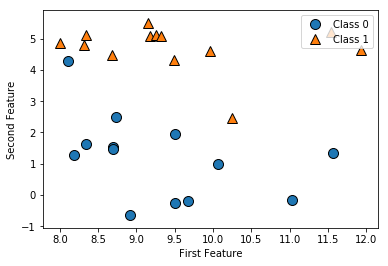

In [33]:
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=1)
plt.xlabel("First Feature")
plt.ylabel("Second Feature")
print("X.shape: {}".format(X.shape))

Text(0,0.5,'Target')

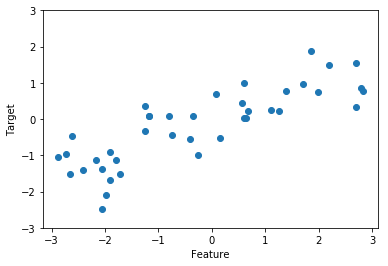

In [34]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [35]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [36]:
print(cancer.data.shape)

(569, 30)


In [37]:
for item in zip(cancer.target_names,np.bincount(cancer.target)):
    print(item)

('malignant', 212)
('benign', 357)


In [38]:
print("Sample counts per class:\n{}".format(
    {n:v for n,v in zip(cancer.target_names, np.bincount(cancer.target))}
))

Sample counts per class:
{'malignant': 212, 'benign': 357}


In [39]:
print("Feature names:\n {}".format(cancer.feature_names))

Feature names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [40]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape: {}".format(boston.data.shape))

Data shape: (506, 13)


In [41]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


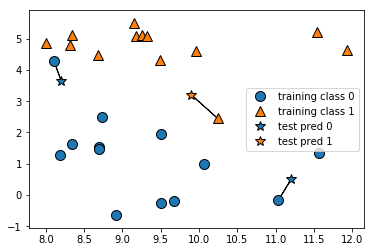

In [42]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

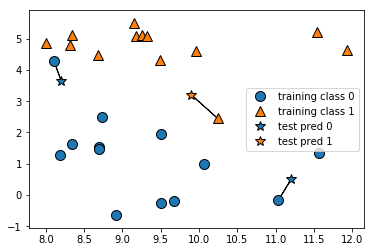

In [43]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

#### K-Nearest Neighbors

###### General

In [52]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [67]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [68]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8571428571428571

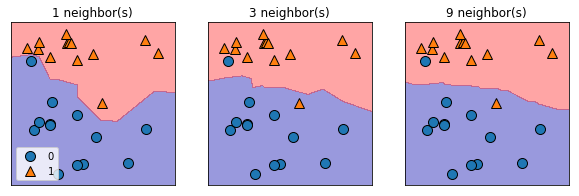

In [71]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
axes
for n_neighbours, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbours).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax = ax, alpha=0.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbours))
axes[0].legend(loc=3)
    

###### Breast Cancer Dataset

In [72]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify = cancer.target, random_state = 66)

In [73]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

In [74]:
for n_neighbors in neighbors_settings:
    clf= KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

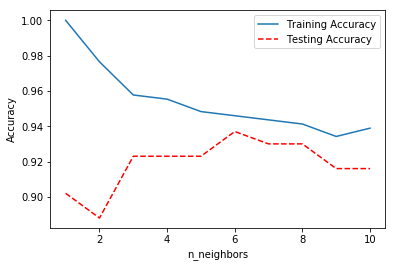

In [83]:
plt.plot(neighbors_settings, training_accuracy, label = "Training Accuracy")
plt.plot(neighbors_settings, test_accuracy, 'r--', label = "Testing Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

###### K-Nearest Neighbors Regression

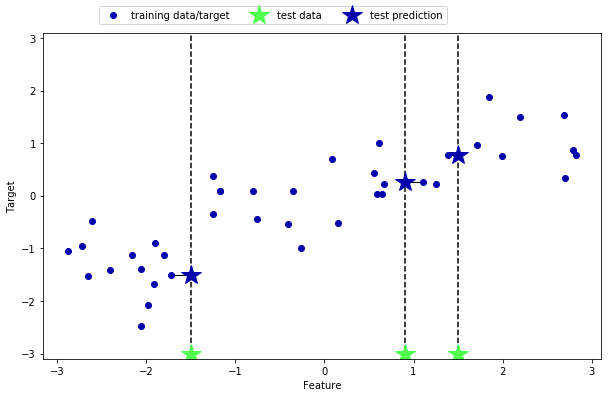

In [86]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

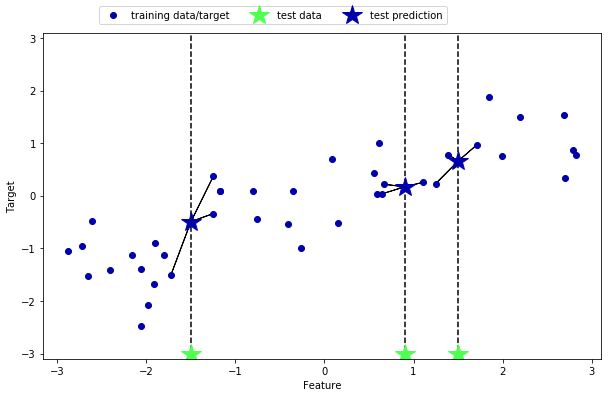

In [87]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [88]:
from sklearn.neighbors import KNeighborsRegressor

In [89]:
X, y = mglearn.datasets.make_wave(n_samples=40)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [93]:
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)
print("Training score: {:.4f}".format(reg.score(X_train, y_train)))
print("Test score: {:.4f}".format(reg.score(X_test, y_test)))

Training score: 0.8194
Test score: 0.8344


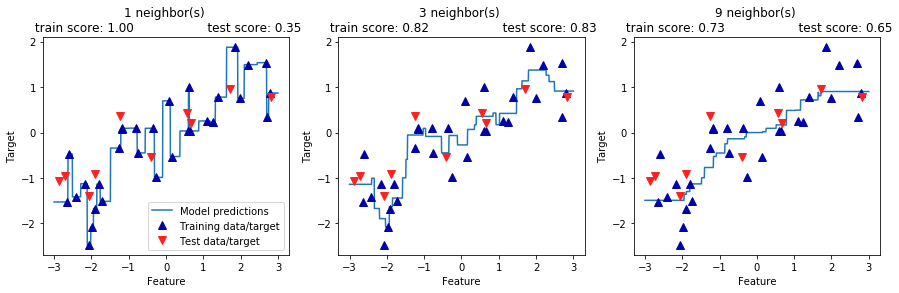

In [100]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors = n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title("{} neighbor(s) \n train score: {:.2f} \
                  test score: {:.2f}".format(n_neighbors, 
                                             reg.score(X_train, y_train),
                                             reg.score(X_test, y_test)
                                            )
                )
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    axes[0].legend(["Model predictions", "Training data/target", "Test data/target"], loc="best")



    